  #   Exploratory Data Analysis ON A Movies Dataset

## Introduction

In this analysis we'll make use of pandas, data cleaning and exploratory data analysis. In order to answer our analysis questions we'll haave to import, clean, combine, reshape, and visualize our data. 

### 1. Load The Data

In the cell below we'll import the necessary libaries with their respective standard aliases.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, we use pandas to load the files we'll use in our analysis.

In [2]:
# Load the title basics file
basics_df = pd.read_csv("title.basics.csv")
basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [3]:
# get summary of the basics dataframe
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In the code cells above i loaded the Title Basics file and got the summary of the dataframe. From the summary there are 146,144 rows with 6 columns and  3 columns contain null values.

In [4]:
# load the title ratings file
ratings_df = pd.read_csv('title.ratings.csv')
ratings_df


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
#get summary of the ratings dataframe
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In the code cells above, i loaded the titile ratings file and got a summary of the dat. from the data there are 73,856 rows with 3 columns and no rows contain null values.

In [6]:
#load the movies_budget file
budget_df = pd.read_csv('tn.movie_budgets.csv')
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,"$7,000",$0,$0
5778,79,2-Apr-99,Following,"$6,000","$48,482","$240,495"
5779,80,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,29-Sep-15,A Plague So Pleasant,"$1,400",$0,$0


Now we can familirialize ourselves with our data by getting to know it's dimensions, the number of columns it contains, if there are null values in the data and the data types

In [7]:
## get a summary of the budget dataframe
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the results provided above we can tell that our data contains 6 columns with 5782 rows. There are no null values in the columns and almost every columns' data type is object apart from the id coluumn which is an integer

### 2. Data Cleaning and Exploration
In the cells that follow, will now begin our analysis. We will clean our loaded data and also explore it by discovering different factors about our data and coming up with different visualizations

#### 1. What Is the Relationship between Budget and Revenue?
In this question we want to find what is the relationship between Revenue and the Budget using the budget dataframe.
In order to do this we first need to find the revenue by first finding the sum of the gross earnings.
Based off the summarry of the budget dataframe its evident that the production budget, domestic and worldwide gross are in the object data type and need to be converted into the integer data type.

In [8]:
# convert the production,domestic,worldwide columns into the integer datatype
budget_df[budget_df.columns[3:]] = budget_df[budget_df.columns[3:]].replace('[\$,]', '', regex=True)

In the cell above, i filtered out the 3rd to the last columns through slicing. The first step in our conversion is to remove the dollar sign.

In [9]:
budget_df[budget_df.columns[3:]] = budget_df[budget_df.columns[3:]].replace('[,]','',regex=True)

In the cell above, I then removed the comma that was in between the digits as you cannot convert numbers with commas to integers as it will bring about an error.

In [10]:
# assign the integer data type to the columns
budget_df[budget_df.columns[3:]] = budget_df[budget_df.columns[3:]].astype(np.int64)

In [11]:
# get summary of the dataframe
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


AS you can see from the above cell, i have successfully converted the data type of the last three columns to integer. From the summary its evident that none of the columns have null values, so we need to check if there are any placeholders in the columns.

In [12]:
budget_df['domestic_gross'].value_counts()

0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64

In [13]:
budget_df['worldwide_gross'].value_counts()

0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

In [14]:
budget_df['production_budget'].value_counts()

20000000    231
10000000    212
30000000    177
15000000    173
25000000    171
           ... 
16400000      1
103000        1
6537890       1
780000        1
28500000      1
Name: production_budget, Length: 509, dtype: int64

In [15]:
# Create the revenue column
budget_df['revenue'] = budget_df['domestic_gross'] + budget_df['worldwide_gross']

In [16]:
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0
5778,79,2-Apr-99,Following,6000,48482,240495,288977
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0


From the above code, we have successfully added the revenue column to our dataframe.

##### Answering the Question

In order to answer the question we need to plot a scatter plot to show the correlation between the two but first i'll get the correlation coefficient to give me a rough idea on what the correlation between the two might be,that is, it can be positive,negative or neutral.

In [17]:
# calculate the correlation coefficient
coef = np.corrcoef(budget_df['production_budget'],budget_df['revenue'])
coef

array([[1.        , 0.73991215],
       [0.73991215, 1.        ]])

In the above cell, i calculated the corellation coefficient using numpy and based off our results we can tell that it's positive. We'll plot the same down below just to confirm our results above.

In the cell below make a copy of the budget dataframe,

In [18]:
# make a  Copy of the budget dataframe
budget_df1 = budget_df.copy()

In [19]:
# sort the new dataframe by the production budget column
budget_df1 = budget_df1.sort_values(by='production_budget')
budget_df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
5781,82,5-Aug-05,My Date With Drew,1100,181041,181041,362082
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676
5778,79,2-Apr-99,Following,6000,48482,240495,288977
5776,77,31-Dec-04,The Mongol King,7000,900,900,1800
...,...,...,...,...,...,...,...
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750


In the above code, i sorted the dataframe by the production budget in ascending order. This is to make make my plot more presentable as the values will move from the lowest to the highest.

In the cell below, plot the graph:

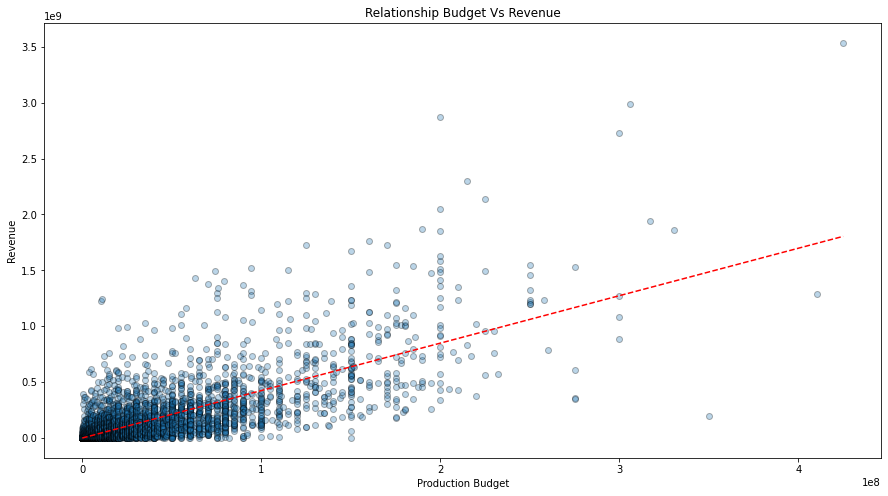

In [20]:
# The relationship between budget and revenue
x = budget_df1['production_budget']
y = budget_df1['revenue']

# Calculate equation for trend line(line of best fit)
z = np.polyfit(budget_df1['production_budget'],budget_df1['revenue'],1)
p = np.poly1d(z)

#plot the graph
fig, ax = plt.subplots(figsize = (15,8))

ax.scatter(x, y, alpha=0.3, edgecolor='black')

ax.plot(x,p(x),color ="red", linestyle="--")


ax.set_title('Relationship Budget Vs Revenue')

ax.set_xlabel('Production Budget')

ax.set_ylabel('Revenue');

Based off our results, its evident that the revenue and production budget are positively correlated.
Therefore an increase in one will lead to an increase in the other.

#### 2. Find the top 20 movies that grossed the most revenue?

Here we'll find which  20 movies had the highest revenue earnings while using the budget dataframe.

In [21]:
# Load The data
budget_df2 = budget_df.copy()
budget_df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0
5778,79,2-Apr-99,Following,6000,48482,240495,288977
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0


In [22]:
# sort the data frame in descending order by the revenue and filter out the first 20 entries
sort_df = budget_df2.sort_values(by='revenue', ascending=False).head(20)
sort_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904
5,6,18-Dec-15,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445
42,43,19-Dec-97,Titanic,200000000,659363944,2208208395,2867572339
6,7,27-Apr-18,Avengers: Infinity War,300000000,678815482,2048134200,2726949682
33,34,12-Jun-15,Jurassic World,215000000,652270625,1648854864,2301125489
26,27,4-May-12,The Avengers,225000000,623279547,1517935897,2141215444
41,42,16-Feb-18,Black Panther,200000000,700059566,1348258224,2048317790
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
66,67,3-Apr-15,Furious 7,190000000,353007020,1518722794,1871729814
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831


In the code cell above i have sorted the budget 2 dataframe be the revenue in descending order and filtered out the first 20 entries

In order to answer the question above, i will plot a graph showing the distribution between the revenue and the top movie titles.

In the cell below plot the graph:

c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


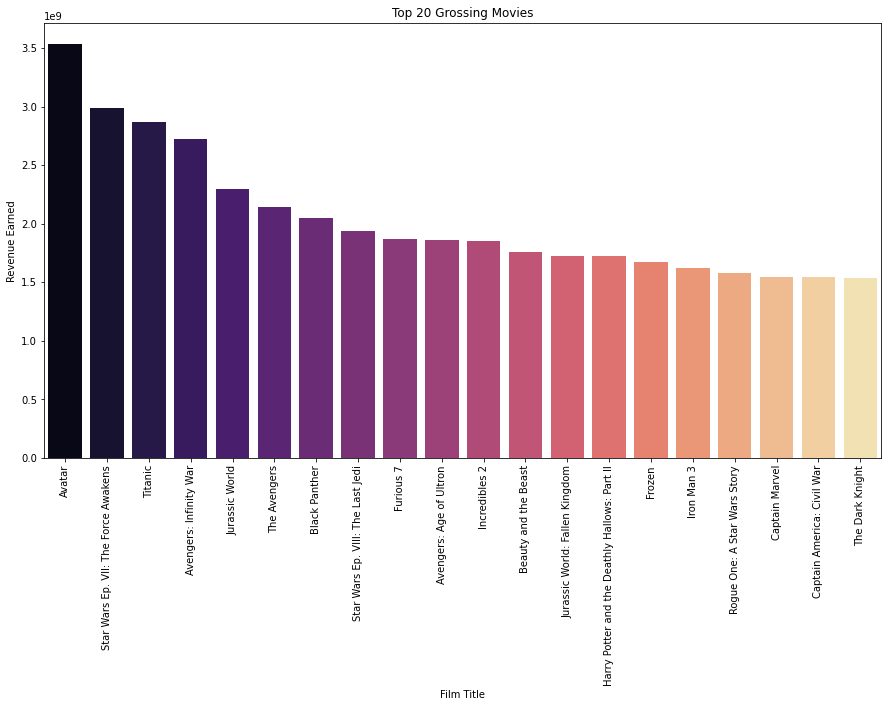

In [23]:
# plot the graph
x = sort_df['movie']
y = sort_df['revenue']

bax,ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x, y, data=sort_df, palette='magma', orient='v')

ax.set_title('Top 20 Grossing Movies')

ax.set_xlabel('Film Title')

ax.set_ylabel('Revenue Earned')

plt.xticks(rotation = 90, fontsize=10)

plt.yticks(fontsize=10);

From the above results, we can tell that 'Avatar' is the top most grossing movie having the highest revenue earned followed by 'Star Wars Ep. VII: The Force Awakens' and 'Titanic'

#### 3. Analysis of The Return On Investment

It is important to understand if you are making any profits on the production budget. To do this we need to calculate the Return on Investment('ROI') which is a ratio between net income and investment and it is used to evaluate the efficiency of an investment. We will calculate it as the ratio of revenue to the budget incurred. After which we will answer some of the analysis questions based on the data.

In [24]:
# calculate the ROI and create the ROI column
budget_df['ROI'] = budget_df['revenue'] / budget_df['production_budget']

In the above cell, i found the ROI by dividing the revenue by the budget to find the ratio. Then place the values in the ROI column.

In [25]:
# load the data
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,ROI
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904,8.322007
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,3.133774
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700,0.550071
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,5.632244
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,6.110105
...,...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0,0.000000
5778,79,2-Apr-99,Following,6000,48482,240495,288977,48.162833
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676,0.535200
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0,0.000000


After loading the data, you can see that the ROI column has been added to the budget dataframe. Next, i wll check to see if there are any null values.

In [26]:
# check for null values
budget_df['ROI'].isna().sum()

0

##### 1. Find Top 10 movies with the highest ROI whose budget is greater than 10 million Dollars?

In this question we will compare the movies and their respective ROI and find the top 10 ten movies with the highest ROI's and  abudget that is greater than 10 million Dollars

In [27]:
# make copy of the budget dataframe
budget_df3 = budget_df.copy()
budget_df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,ROI
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904,8.322007
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,3.133774
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700,0.550071
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,5.632244
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,6.110105
...,...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0,0.000000
5778,79,2-Apr-99,Following,6000,48482,240495,288977,48.162833
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676,0.535200
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0,0.000000


In [28]:
budget_df3 = budget_df3[budget_df3['production_budget'] > 10000000]
budget_df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,ROI
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904,8.322007
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,3.133774
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700,0.550071
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,5.632244
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,6.110105
...,...,...,...,...,...,...,...,...
3530,31,2-Nov-01,Le Fabuleux destin d'AmÃ©lie Poulain,10350000,33201661,174201661,207403322,20.038968
3531,32,4-Jan-19,PMC: deo beong-keo,10300000,0,12478635,12478635,1.211518
3532,33,18-Feb-83,Lovesick,10100000,10143618,10143618,20287236,2.008637
3533,34,30-Apr-10,Housefull,10100000,1183658,18726300,19909958,1.971283


In the above code cell, i have filtered out the data ,with reference to the production budget, by indexing the row that have budget value of above 10 million dollars.

In [29]:
data_sort = budget_df3.sort_values(by='ROI', ascending=False).head(10)
data_sort

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,ROI
3525,26,11-Jun-82,ET: The Extra-Terrestrial,10500000,435110554,792965326,1228075880,116.959608
3464,65,25-May-77,Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,1247596014,113.417819
3340,41,20-Jun-75,Jaws,12000000,260000000,470700000,730700000,60.891667
3341,42,26-Dec-73,The Exorcist,12000000,230347346,428214478,658561824,54.880152
2991,92,16-Nov-90,Home Alone,15000000,285761243,476684675,762445918,50.829728
2485,86,13-Nov-91,Beauty and the Beast,20000000,376057266,608431132,984488398,49.224420
3517,18,25-May-12,Les Intouchables,10800000,13182281,484873045,498055326,46.116234
3171,72,23-Mar-90,Pretty Woman,14000000,178406268,432645872,611052140,43.646581
2159,60,25-Feb-04,The Passion of the Christ,25000000,370782930,622341924,993124854,39.724994
2996,97,26-Nov-10,The Kingâs Speech,15000000,138797449,430821168,569618617,37.974574


In the cell above, I have sorted the dataframe by the ROI in descending order and indexed the first 10 entries

In the cell below, i will plot a graph based on the dataframe above

c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\matp

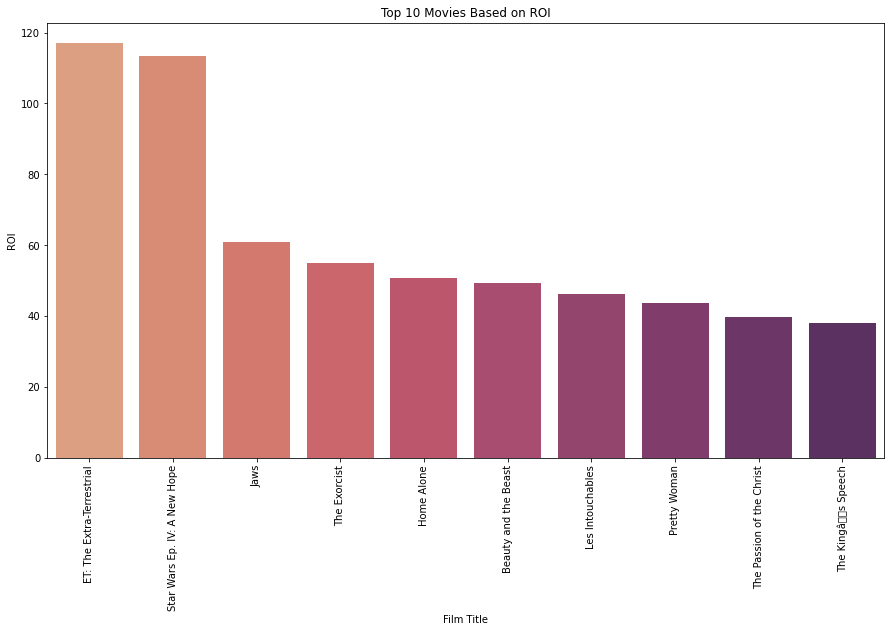

In [30]:
# plot the graph
x = data_sort['movie']
y = data_sort['ROI']

bax,ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x, y, data=sort_df, palette='flare', orient='v')

ax.set_title('Top 10 Movies Based on ROI')

ax.set_xlabel('Film Title')

ax.set_ylabel('ROI')


plt.xticks(rotation = 90, fontsize=10)

plt.yticks(fontsize=10);

From the above plot, its evident that 'ET: The Extra-Terrestrial' has the highest Return On Investment which is about 116.95 followed by 'Star Wars Ep. IV: A New Hope' with 113.417819.

#### 4. Find The movie Genres With The Highest Ratings?
In this question we will first load the dataset that is required for our analysis and then proceed to answering the question by comparing the different movie genres and their respective ratings

##### Load The Data
In order to answer the above analysis question, we will require data from the basics and ratings dataframes.

In [31]:
# Load data
basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [32]:
ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Based off our question its evident that the ratings and genre columns are contained in two different dataframes, so next we need to merge the two dataframes and its evident that the 'tconst' column is common in both, hence i will perform and inner merge taking the common rows from both tables.

In [33]:
# merge the two dataframes to create a new data frame.
basics_ratings_df = pd.merge(basics_df, ratings_df, on='tconst', how='inner')
basics_ratings_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [34]:
# get summary of the new dataframe
basics_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


From the summary, the dataframe contains 73856 rows, 8 columns with two columns containing null values. From the question we need the 'averagerating' and 'genre' columns and based on the summary the genres contains null value.

In [35]:
# Find the total number of null values
basics_ratings_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The runtime contains 7620 null entries and the genre contains 804

In [36]:
# find what percentage the null entries n the genre column represent in relation to the dataframe.
len(basics_ratings_df[basics_ratings_df.genres.isna()]) / len(basics_ratings_df)

0.010886048526863085

In the above cell code, i calculated the the percentage of the null values in relation to the len of the dataframe and it represents about 1%. Therefore i will drop the null values contained in the genre column

In [37]:
# Drop the null values
basics_ratings_df.dropna(subset=['genres'], inplace=True)

In [38]:
#Check to confirm the values are dropped
basics_ratings_df.genres.isna().sum()

0

In the above code cells, i dropped the null values in the genres column using 'dropna' then checked to confirm that the values are actually dropped.

In [39]:
basics_ratings_df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [40]:
genres =basics_ratings_df['genres']
genre_list = []
for genre in genres:
    genre_list.append(genre.split(','))
genre_list

[['Action', 'Crime', 'Drama'],
 ['Biography', 'Drama'],
 ['Drama'],
 ['Comedy', 'Drama'],
 ['Comedy', 'Drama', 'Fantasy'],
 ['Horror', 'Thriller'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Drama'],
 ['History'],
 ['Documentary'],
 ['Drama'],
 ['Documentary'],
 ['Animation', 'Drama', 'History'],
 ['Drama'],
 ['Drama'],
 ['Drama', 'Mystery'],
 ['Action', 'Animation', 'Comedy'],
 ['Crime', 'Drama'],
 ['Biography', 'Comedy', 'Drama'],
 ['Documentary'],
 ['Drama'],
 ['Action', 'Drama'],
 ['Documentary', 'History'],
 ['Sci-Fi'],
 ['Comedy'],
 ['Documentary'],
 ['Thriller'],
 ['Crime', 'Drama'],
 ['Adventure', 'Animation', 'Sci-Fi'],
 ['Action', 'Crime', 'Drama'],
 ['Drama', 'Horror'],
 ['Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Family'],
 ['Adventure', 'Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Adventure', 'Drama', 'Romance'],
 ['Comedy', 'Crime', 'Drama'],
 ['Biography'],
 ['Horror'],
 ['Comedy', 'Drama'],
 ['Drama'],
 ['Adventure', 'Comedy', '

In [41]:
split_genre = []
for values in genre_list:
    for value in values:
        split_genre.append(value)
split_genre

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Drama',
 'History',
 'Documentary',
 'Drama',
 'Documentary',
 'Animation',
 'Drama',
 'History',
 'Drama',
 'Drama',
 'Drama',
 'Mystery',
 'Action',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Drama',
 'Documentary',
 'Drama',
 'Action',
 'Drama',
 'Documentary',
 'History',
 'Sci-Fi',
 'Comedy',
 'Documentary',
 'Thriller',
 'Crime',
 'Drama',
 'Adventure',
 'Animation',
 'Sci-Fi',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Horror',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Family',
 'Adventure',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Adventure',
 'Animation',
 'Comedy',
 'Adventure',
 'Drama',
 'Romance',
 'Comedy',
 'Crime',
 'Drama',
 'Biography',
 'Horror',
 'Comedy',
 'Drama',
 'Drama',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'A

In [42]:
unique_genres = []
for value in split_genre:
    if value not in unique_genres:
        unique_genres.append(value)
unique_genres


['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'History',
 'Documentary',
 'Mystery',
 'Sci-Fi',
 'Family',
 'Romance',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'News',
 'Reality-TV',
 'Game-Show',
 'Adult',
 'Short']

In [43]:
len(unique_genres)

26

In [44]:
basics_ratings_copy = basics_ratings_df.copy()
basics_ratings_copy

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [45]:
basics_ratings_copy[['genre1', 'genre2','genre3']] = basics_ratings_copy['genres'].str.split(',', 3, expand=True). fillna(value="")
basics_ratings_copy[['genre1', 'genre2','genre3']]


,genre1,genre2,genre3
0,Action,Crime,Drama
1,Biography,Drama,
2,Drama,,
3,Comedy,Drama,
4,Comedy,Drama,Fantasy
...,...,...,...
73850,Documentary,,
73851,Documentary,,
73852,Drama,Family,
73853,Documentary,,


In [46]:
# load the data
basics_ratings_copy

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama,,
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Comedy,Drama,
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,Documentary,,
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,Documentary,,
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Drama,Family,
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,Documentary,,


In [47]:
# get the summary of the data
basics_ratings_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
 8   genre1           73052 non-null  object 
 9   genre2           73052 non-null  object 
 10  genre3           73052 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.7+ MB


In [48]:
basics_ratings_copy['genre2']=basics_ratings_copy['genre2'].fillna(basics_ratings_copy.genre1, inplace=True)
basics_ratings_copy['genre3']=basics_ratings_copy['genre3'].fillna(basics_ratings_copy.genre1,inplace=True)

In [49]:
basics_ratings_copy

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,None,None
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography,None,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Comedy,None,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy,None,None
...,...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,Documentary,None,None
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,Documentary,None,None
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Drama,None,None
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,Documentary,None,None


In [50]:
basics_ratings_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
 8   genre1           73052 non-null  object 
 9   genre2           0 non-null      object 
 10  genre3           0 non-null      object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.7+ MB


In [51]:
len(basics_ratings_copy['genre1'].unique())

25

In [54]:
genre_ratings= basics_ratings_copy.groupby('genre1').mean()
genre_ratings

,start_year,runtime_minutes,averagerating,numvotes
genre1,,,,
Action,2014.281912,104.003176,5.810361,14476.485690
Adult,2015.000000,120.000000,2.000000,128.000000
Adventure,2014.225732,90.730269,6.386710,10419.625193
Animation,2014.317048,82.396074,6.252391,2026.006237
Biography,2013.960967,90.547698,7.174512,5185.684241
Comedy,2014.250188,97.206209,5.998505,2733.420780
Crime,2014.357257,97.109636,6.159102,5287.373296
Documentary,2014.277897,86.936973,7.316595,213.035382
Drama,2014.268307,98.247568,6.370563,2198.860166


In [58]:
genre_ratings.reset_index(inplace=True)

In [60]:
genre_ratings.drop('start_year', axis=1, inplace=True)

In [61]:
genre_ratings.rename(columns={'genre1': 'genre'}, inplace=True)

In [67]:
genre_ratings.sort_values(by='averagerating', ascending=False,inplace=True)

c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


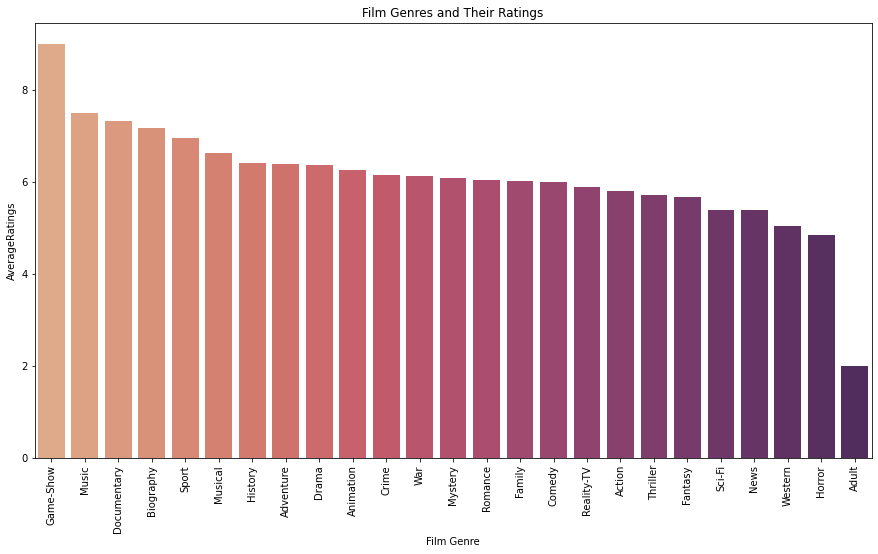

In [68]:
x = genre_ratings['genre']
y = genre_ratings['averagerating']

bax,ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x, y, data=sort_df, palette='flare', orient='v')

ax.set_title('Film Genres and Their Ratings')

ax.set_xlabel('Film Genre')

ax.set_ylabel('AverageRatings')


plt.xticks(rotation = 90, fontsize=10)

plt.yticks(fontsize=10);

In [69]:
basics_copy = basics_df.copy()
basics_copy

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [70]:
basics_copy.set_index('primary_title', inplace=True)


In [71]:
basics_copy.reset_index()

,primary_title,tconst,original_title,start_year,runtime_minutes,genres
0,Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,Kuambil Lagi Hatiku,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,tt9916730,6 Gunn,2017,116.0,NaN


In [72]:
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,ROI
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904,8.322007
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,3.133774
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700,0.550071
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,5.632244
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,6.110105
...,...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0,0.000000
5778,79,2-Apr-99,Following,6000,48482,240495,288977,48.162833
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676,0.535200
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0,0.000000


In [73]:
budget_copy= budget_df.copy()
budget_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,ROI
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904,8.322007
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,3.133774
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700,0.550071
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,5.632244
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,6.110105
...,...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0,0.000000
5778,79,2-Apr-99,Following,6000,48482,240495,288977,48.162833
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676,0.535200
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0,0.000000


In [74]:
budget_copy.set_index('movie', inplace=True)

In [75]:
budget_copy.reset_index()

,movie,id,release_date,production_budget,domestic_gross,worldwide_gross,revenue,ROI
0,Avatar,1,18-Dec-09,425000000,760507625,2776345279,3536852904,8.322007
1,Pirates of the Caribbean: On Stranger Tides,2,20-May-11,410600000,241063875,1045663875,1286727750,3.133774
2,Dark Phoenix,3,7-Jun-19,350000000,42762350,149762350,192524700,0.550071
3,Avengers: Age of Ultron,4,1-May-15,330600000,459005868,1403013963,1862019831,5.632244
4,Star Wars Ep. VIII: The Last Jedi,5,15-Dec-17,317000000,620181382,1316721747,1936903129,6.110105
...,...,...,...,...,...,...,...,...
5777,Red 11,78,31-Dec-18,7000,0,0,0,0.000000
5778,Following,79,2-Apr-99,6000,48482,240495,288977,48.162833
5779,Return to the Land of Wonders,80,13-Jul-05,5000,1338,1338,2676,0.535200
5780,A Plague So Pleasant,81,29-Sep-15,1400,0,0,0,0.000000


In [76]:
budget_basics_df = budget_copy.join(basics_copy, on='movie', how='inner')
budget_basics_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,revenue,ROI,tconst,original_title,start_year,runtime_minutes,genres
movie,,,,,,,,,,,,
Avatar,1,18-Dec-09,425000000,760507625,2776345279,3536852904,8.322007,tt1775309,Abatâ,2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,2,20-May-11,410600000,241063875,1045663875,1286727750,3.133774,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,3,7-Jun-19,350000000,42762350,149762350,192524700,0.550071,tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,4,1-May-15,330600000,459005868,1403013963,1862019831,5.632244,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,7,27-Apr-18,300000000,678815482,2048134200,2726949682,9.089832,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
Cure,68,6-Jul-01,10000,94596,94596,189192,18.919200,tt5936960,Cure,2014,NaN,NaN
Bang,70,1-Apr-96,10000,527,527,1054,0.105400,tt6616538,Bang,2015,NaN,NaN
Newlyweds,73,13-Jan-12,9000,4584,4584,9168,1.018667,tt1880418,Newlyweds,2011,95.0,"Comedy,Drama"


In [77]:
budget_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3815 entries, Avatar to A Plague So Pleasant
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3815 non-null   int64  
 1   release_date       3815 non-null   object 
 2   production_budget  3815 non-null   int64  
 3   domestic_gross     3815 non-null   int64  
 4   worldwide_gross    3815 non-null   int64  
 5   revenue            3815 non-null   int64  
 6   ROI                3815 non-null   float64
 7   tconst             3815 non-null   object 
 8   original_title     3814 non-null   object 
 9   start_year         3815 non-null   int64  
 10  runtime_minutes    3328 non-null   float64
 11  genres             3743 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 387.5+ KB


In [85]:
budget_basics_df.reset_index(inplace=True)

In [86]:
budget_basics_df.isna().sum()

movie                  0
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
revenue                0
ROI                    0
tconst                 0
original_title         0
start_year             0
runtime_minutes      434
genres                 0
genre1                 0
genre2                 0
genre3                 0
dtype: int64

In [87]:
len(budget_basics_df[budget_basics_df.genres.isna()]) / len(budget_basics_df)

0.0

In [88]:
budget_basics_df.dropna(subset=['genres'], inplace=True)

In [89]:
budget_basics_df.genres.isna().sum()

0

In [90]:
budget_basics_df

,movie,id,release_date,production_budget,domestic_gross,worldwide_gross,revenue,ROI,tconst,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3
0,Avatar,1,18-Dec-09,425000000,760507625,2776345279,3536852904,8.322007,tt1775309,Abatâ,2011,93.0,Horror,Horror,,
1,Pirates of the Caribbean: On Stranger Tides,2,20-May-11,410600000,241063875,1045663875,1286727750,3.133774,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
2,Dark Phoenix,3,7-Jun-19,350000000,42762350,149762350,192524700,0.550071,tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
3,Avengers: Age of Ultron,4,1-May-15,330600000,459005868,1403013963,1862019831,5.632244,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
4,Avengers: Infinity War,7,27-Apr-18,300000000,678815482,2048134200,2726949682,9.089832,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,Clean,67,28-Apr-06,10000,138711,138711,277422,27.742200,tt6619196,Clean,2017,70.0,"Comedy,Drama,Horror",Comedy,Drama,Horror
3739,Cure,68,6-Jul-01,10000,94596,94596,189192,18.919200,tt1872026,Cure,2011,93.0,Drama,Drama,,
3740,Newlyweds,73,13-Jan-12,9000,4584,4584,9168,1.018667,tt1880418,Newlyweds,2011,95.0,"Comedy,Drama",Comedy,Drama,
3741,Red 11,78,31-Dec-18,7000,0,0,0,0.000000,tt7837402,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",Horror,Sci-Fi,Thriller


In [91]:
budget_basics_df[['genre1', 'genre2','genre3']] = budget_basics_df['genres'].str.split(',', 3, expand=True). fillna(value="")
budget_basics_df[['genre1', 'genre2','genre3']]

,genre1,genre2,genre3
0,Horror,,
1,Action,Adventure,Fantasy
2,Action,Adventure,Sci-Fi
3,Action,Adventure,Sci-Fi
4,Action,Adventure,Sci-Fi
...,...,...,...
3738,Comedy,Drama,Horror
3739,Drama,,
3740,Comedy,Drama,
3741,Horror,Sci-Fi,Thriller


In [92]:
budget_basics_df['genre2'] = budget_basics_df['genre2'].fillna(basics_ratings_copy.genre1, inplace=True)
budget_basics_df['genre3'] = budget_basics_df['genre3'].fillna(basics_ratings_copy.genre1,inplace=True)